<a href="https://colab.research.google.com/github/sha863/MSc-Dissertation-2022/blob/main/Spam_email_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install nltk

In [3]:
import numpy as np
import pandas as pd
import re
import string
import math
import seaborn as sns
from google.colab import data_table
data_table.enable_dataframe_formatter()


[Source of data](https://www.kaggle.com/team-ai/spam-text-message-classification)

In [4]:
data = pd.read_csv('spam.csv',encoding='latin-1')

In [5]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data.describe(include="all")

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)
data.head()

(5572, 2)
(5169, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

# Text Preprocessing Techniques

## Lower case

In [10]:
data['text'] = data['text'].str.lower()

In [11]:
data.text[0]

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

##  Remove punctuations

In [12]:
data['text'] = data['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [13]:
data.text[0]

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

##  Remove words and digits containing digits

In [14]:
#remove words and digits
data['text'] = data['text'].apply(lambda x: re.sub('\w*\d\w*','',x))

In [15]:
data.text[2]

'free entry in  a wkly comp to win fa cup final tkts  may  text fa to  to receive entry questionstd txt ratetcs apply '

## Remove Stopwords

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [17]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('http')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
data['text'] = data['text'].apply(lambda x: remove_stopwords(x))

In [18]:
data.text[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

## Stemming

In [19]:
#stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
data["text"] = data["text"].apply(lambda x: stem_words(x))

In [20]:
data.text[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

## Lemmatization

In [21]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
data["text"] = data["text"].apply(lambda text: lemmatize_words(text))

In [22]:
data.head()

,label,text
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt may ...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though


## Remove Extra Spaces

In [23]:
data["text"] = data["text"].apply(lambda x: re.sub(' +', ' ', x))

In [24]:
data.text[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [25]:
data.head()

,label,text
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt may ...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though


# Modelling

In [26]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB



from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


In [27]:
data.label.value_counts(normalize=True)*100

ham     87.366996
spam    12.633004
Name: label, dtype: float64

## Support Vector Classifier

### Using counting word occurence

In [28]:
# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', CountVectorizer()), # Converts text into numeric format to feed in models
                 ('model', LinearSVC())]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.07%


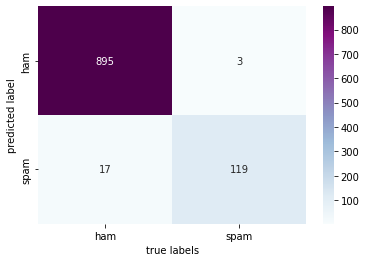

In [29]:
x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()

In [30]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       898
        spam       0.98      0.88      0.92       136

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



### Normalized Count Occurrence

In [31]:
# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', TfidfVectorizer(use_idf=False, norm="l2")), # Converts text into numeric format to feed in models
                 ('model', LinearSVC())]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 97.68%


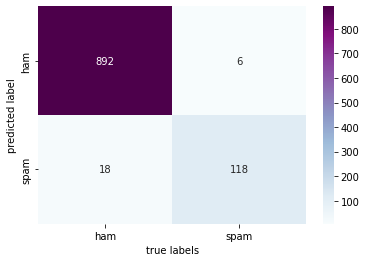

In [32]:
x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()

In [33]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       898
        spam       0.95      0.87      0.91       136

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



### Using TFIDF 

In [34]:
# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', CountVectorizer()), # Converts text into numeric format to feed in models
                 ('tfidf', TfidfTransformer()), # Technique to extract features from data
                 ('model', LinearSVC())]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 97.68%


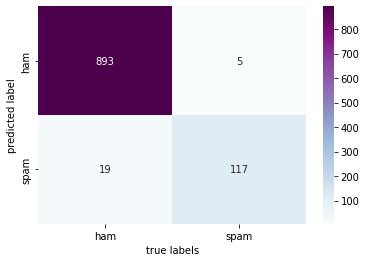

In [35]:
x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()

In [36]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       898
        spam       0.96      0.86      0.91       136

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



### Combined 

Linear SVC using counting word occurence   
accuracy: 98.07%


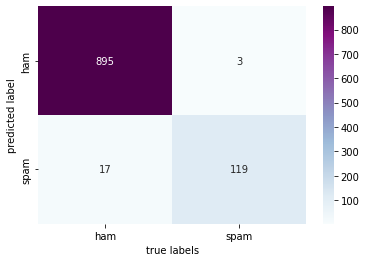



		Classification report

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       898
        spam       0.98      0.88      0.92       136

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034


------------------------------------------------------------------------------------------

Linear SVC using normalized count occurence   
accuracy: 97.68%


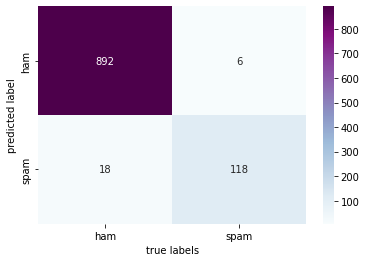



		Classification report

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       898
        spam       0.95      0.87      0.91       136

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034


--------------------------------------------------------------------------------------------

Linear SVC using TFIDF   
accuracy: 97.68%


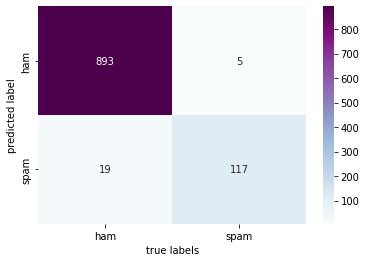



		Classification report

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       898
        spam       0.96      0.86      0.91       136

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [74]:
print('\033[1mLinear SVC using counting word occurence   \033[0m')

# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', CountVectorizer()), # Converts text into numeric format to feed in models
                 ('model', LinearSVC())]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))
print("\n------------------------------------------------------------------------------------------\n")

print('\033[1mLinear SVC using normalized count occurence   \033[0m')
# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', TfidfVectorizer(use_idf=False, norm="l2")), # Converts text into numeric format to feed in models
                 ('model', LinearSVC())]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))
print("\n--------------------------------------------------------------------------------------------\n")

print('\033[1mLinear SVC using TFIDF   \033[0m')
# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', CountVectorizer()), # Converts text into numeric format to feed in models
                 ('tfidf', TfidfTransformer()), # Technique to extract features from data
                 ('model', LinearSVC())]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))



## Naive Bayes Classifier

In [38]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 95.26%


In [39]:
print(confusion_matrix(y_test, prediction))

[[898   0]
 [ 49  87]]


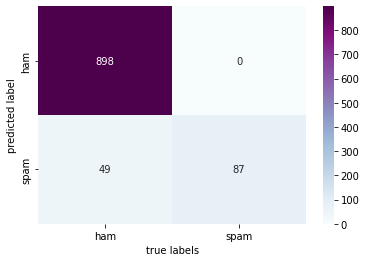

In [40]:
x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()

In [41]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       898
        spam       1.00      0.64      0.78       136

    accuracy                           0.95      1034
   macro avg       0.97      0.82      0.88      1034
weighted avg       0.96      0.95      0.95      1034



## Logistic Regression Classifier

In [42]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 95.84%


In [43]:
print(confusion_matrix(y_test, prediction))

[[896   2]
 [ 41  95]]


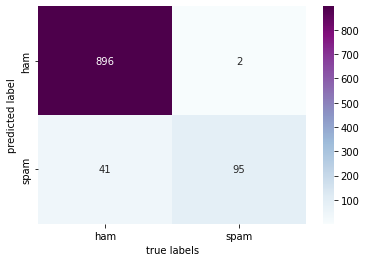

In [44]:
x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()

In [45]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       898
        spam       0.98      0.70      0.82       136

    accuracy                           0.96      1034
   macro avg       0.97      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034



## Decision Tree Classifier

In [46]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=41))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 94.39%


In [47]:
print(confusion_matrix(y_test, prediction))

[[883  15]
 [ 43  93]]


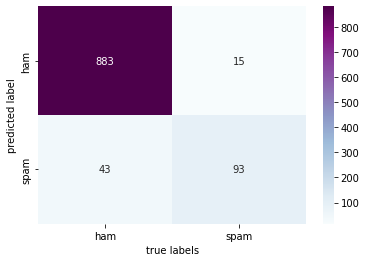

In [48]:
x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()

In [49]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.95      0.98      0.97       898
        spam       0.86      0.68      0.76       136

    accuracy                           0.94      1034
   macro avg       0.91      0.83      0.87      1034
weighted avg       0.94      0.94      0.94      1034



## KNN Classifier

In [50]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute'))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 90.72%


In [51]:
print(confusion_matrix(y_test, prediction))

[[898   0]
 [ 96  40]]


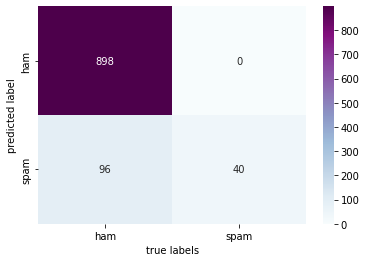

In [52]:
x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()

In [53]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       898
        spam       1.00      0.29      0.45       136

    accuracy                           0.91      1034
   macro avg       0.95      0.65      0.70      1034
weighted avg       0.92      0.91      0.88      1034



# Feature selection Techniques

## Counting word occurrence.

The reason behind of using this approach is that keyword or important signal will occur again and again. So if the number of occurrence represent the importance of word. More frequency means more importance.

In [54]:
count_vec = CountVectorizer()
count_occurs = count_vec.fit_transform(data['text'])
count_occur_df = pd.DataFrame((count, word) for word, count in zip(count_occurs.toarray().tolist()[0], count_vec.get_feature_names()))
count_occur_df.columns = ['Word', 'Count']
count_occur_df.sort_values('Count', ascending=False, inplace=True)
count_occur_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word,Count
6342,wat,1
204,amor,1
759,buffet,1
761,bugi,1
2267,go,1


## Normalized Count Occurrence

If we think that high frequency may dominate the result and causing model bias. Normalization can be apply to pipeline easily.

In [55]:
norm_count_vec = TfidfVectorizer(use_idf=False, norm='l2')
norm_count_occurs = norm_count_vec.fit_transform(data['text'])
norm_count_occur_df = pd.DataFrame((count, word) for word, count in zip(
    norm_count_occurs.toarray().tolist()[0], norm_count_vec.get_feature_names()))
norm_count_occur_df.columns = ['Word', 'Count']
norm_count_occur_df.sort_values('Count', ascending=False, inplace=True)
norm_count_occur_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word,Count
6342,wat,0.267261
204,amor,0.267261
759,buffet,0.267261
761,bugi,0.267261
2267,go,0.267261


## TF-IDF

TF-IDF take another approach which is believe that high frequency may not able to provide much information gain. In another word, rare words contribute more weights to the model. 

In [56]:
tfidf_vec = TfidfVectorizer()
tfidf_count_occurs = tfidf_vec.fit_transform(data['text'])
tfidf_count_occur_df = pd.DataFrame((count, word) for word, count in zip(
    tfidf_count_occurs.toarray().tolist()[0], tfidf_vec.get_feature_names()))
tfidf_count_occur_df.columns = ['Word', 'Count']
tfidf_count_occur_df.sort_values('Count', ascending=False, inplace=True)
tfidf_count_occur_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word,Count
204,amor,0.349002
3014,jurong,0.349002
759,buffet,0.333026
1016,cine,0.294380
761,bugi,0.294380


In [57]:
stop_words = ['a', 'an', 'the']

# Basic cleansing
def cleansing(text):
    # Tokenize
    tokens = text.split(' ')
    # Lower case
    tokens = [w.lower() for w in tokens]
    # Remove stop words
    tokens = [w for w in tokens if w not in stop_words]
    return ' '.join(tokens)

# All-in-one preprocess
def preprocess_x(x):
    processed_x = [cleansing(text) for text in x]
    
    return processed_x

def build_model(mode):
    # Intent to use default paramaters for show case
    vect = None
    if mode == 'count':
        vect = CountVectorizer()
    elif mode == 'tf':
        vect = TfidfVectorizer(use_idf=False, norm='l2')
    elif mode == 'tfidf':
        vect = TfidfVectorizer()
    else:
        raise ValueError('Mode should be either count or tfidf')
    
    return Pipeline([
        ('vect', vect),
        ('clf' , LogisticRegression(solver='newton-cg',n_jobs=-1))
    ])

def pipeline(x, y, mode):
    processed_x = preprocess_x(x)
    
    model_pipeline = build_model(mode)
    cv = KFold(n_splits=5, shuffle=True)
    
    scores = cross_val_score(model_pipeline, processed_x, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
    
    return model_pipeline

In [58]:
x = preprocess_x(x_train)
y = y_train
    
model_pipeline = build_model(mode='count')
model_pipeline.fit(x, y)

print('Number of Vocabulary: %d'% (len(model_pipeline.named_steps['vect'].get_feature_names_out())))

Number of Vocabulary: 5923


In [59]:
print('Using Count Vectorizer------')
model_pipeline = pipeline(x_train, y_train, mode='count')

print('Using TF Vectorizer------')
model_pipeline = pipeline(x_train, y_train, mode='tf')

print('Using TF-IDF Vectorizer------')
model_pipeline = pipeline(x_train, y_train, mode='tfidf')

Using Count Vectorizer------
Accuracy: 0.9763 (+/- 0.0094)
Using TF Vectorizer------
Accuracy: 0.9589 (+/- 0.0146)
Using TF-IDF Vectorizer------
Accuracy: 0.9545 (+/- 0.0216)
